In [23]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from librosa.util import find_files
from tqdm import  tqdm
from pathlib import Path
import os

In [21]:
target_dirs='/content/embeddings'

In [25]:
def get_targets (target_dirs):
  targets_temp=[]
  paths=[]
  tar_dir_path = Path(target_dirs)
  for tar_dir in [x1 for x1 in tar_dir_path.iterdir() if x1.is_dir()]:
    for root,dires,files in os.walk(tar_dir):
      print(root,dires,files)
      for file in files:
        paths.append(os.path.join(root,file))
        paths.sort()
  for tar_path in tqdm(paths, ncols=0, desc="Preprocess"):
    targets_temp.append(np.load(tar_path))
  return targets_temp

In [26]:
#dowmload the embedding into embs
embs=get_targets(target_dirs)

/content/embeddings/.ipynb_checkpoints [] []
/content/embeddings/b [] ['bss0.npy']
/content/embeddings/a [] ['ass0.npy', 'ass1.npy']


Preprocess: 100% 3/3 [00:00<00:00, 1307.72it/s]


In [27]:
embs[1].shape

(128,)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 2 nearest neighbors...
[t-SNE] Indexed 3 samples in 0.000s...
[t-SNE] Computed neighbors for 3 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 3 / 3
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 33.533897
[t-SNE] KL divergence after 300 iterations: 0.000116


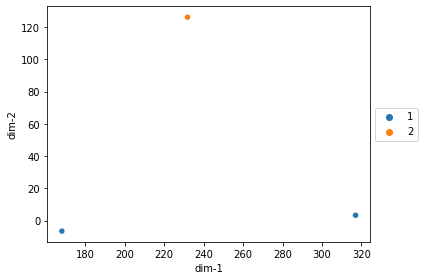

In [29]:
#visulize the embeddings
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#embs=[a,b,c]  
spkr_names=['1','1','2'] #this list should fit the speaker of the embeddings
transformed = tsne.fit_transform(embs)

data = {
        "dim-1": transformed[:, 0],
        "dim-2": transformed[:, 1],
        "label": spkr_names,
    }

plt.figure()
sns.scatterplot(
        x="dim-1",
        y="dim-2",
        hue="label",
        palette=sns.color_palette(n_colors=2),
        data=data,
        legend="full",
    )
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()


['/content/drive/MyDrive/SSB0005_flac/8o6k8-frop8.flac', '/content/drive/MyDrive/SSB0005_flac/91z6h-epi03.flac', '/content/drive/MyDrive/SSB0005_flac/b2egl-a32hn.flac', '/content/drive/MyDrive/SSB0005_flac/dvwn4-1urcn.flac', '/content/drive/MyDrive/SSB0005_flac/egp90-mbpup.flac', '/content/drive/MyDrive/SSB0005_flac/j6lyh-64m0k.flac', '/content/drive/MyDrive/SSB0005_flac/y62c2-kz0ut.flac', '/content/drive/MyDrive/SSB0005_flac/z3c34-6xpo0.flac', '/content/drive/MyDrive/SSB0005_flac/zejki-5w77d.flac', '/content/drive/MyDrive/SSB0005_flac/zl9mp-6cktg.flac']


Preprocess: 100% 10/10 [00:10<00:00,  1.07s/it]


In [ ]:
!cd /content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
